In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()
# session
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)
batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2,0.1,500)

# init = tf.global_variables_initializer()
# sess.run(init)
# print(sess.run(a1),sess.run(b1),x)

In [11]:
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data,a1),b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))
# Declare the loss function as the difference between
# the output and a target value, 0.75.
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation,0.75)))
# help(tf.reduce_mean)

In [29]:
init = tf.global_variables_initializer()
sess.run(init)
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = optimizer.minimize(loss1)
train_step_relu = optimizer.minimize(loss2)
# Run loop across gate
print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []

# rand_index = np.random.choice(len(x),size=5)
# print(rand_index)
# x_vals = np.transpose(x[rand_index])
# print(x_vals)
for step in range(500):
    rand_index = np.random.choice(len(x),size=batch_size)
    x_vals = np.transpose([x[rand_index]])
    sess.run(train_step_sigmoid,feed_dict={x_data: x_vals})
    sess.run(train_step_relu,feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1,feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2,feed_dict={x_data: x_vals}))
    
    output_sigmoid = sess.run(sigmoid_activation,feed_dict={x_data: x_vals})
    output_relu = sess.run(relu_activation,feed_dict={x_data: x_vals})
    if step % 50 == 0:
        print('sigmoid = ' + str(np.mean(output_sigmoid)) + ' relu = ' + str(np.mean(output_relu)) + " a1=" + str(sess.run(a1)) + " b1=" + str(sess.run(b1)))


Optimizing Sigmoid AND Relu Output to 0.75
sigmoid = 0.285764 relu = 0.0 a1=[[-0.6961062]] b1=[[ 0.48240441]]
sigmoid = 0.388569 relu = 0.0 a1=[[-0.51316565]] b1=[[ 0.57392448]]
sigmoid = 0.483848 relu = 0.0 a1=[[-0.35964698]] b1=[[ 0.6506322]]
sigmoid = 0.554093 relu = 0.0 a1=[[-0.2448626]] b1=[[ 0.70796311]]
sigmoid = 0.60516 relu = 0.0 a1=[[-0.16212055]] b1=[[ 0.74925166]]
sigmoid = 0.639502 relu = 0.0 a1=[[-0.10215653]] b1=[[ 0.77913648]]
sigmoid = 0.664873 relu = 0.0 a1=[[-0.0580206]] b1=[[ 0.80117887]]
sigmoid = 0.683079 relu = 0.0 a1=[[-0.02471659]] b1=[[ 0.81781459]]
sigmoid = 0.696875 relu = 0.0 a1=[[ 0.00090786]] b1=[[ 0.83060825]]
sigmoid = 0.707339 relu = 0.0 a1=[[ 0.02091184]] b1=[[ 0.8406021]]


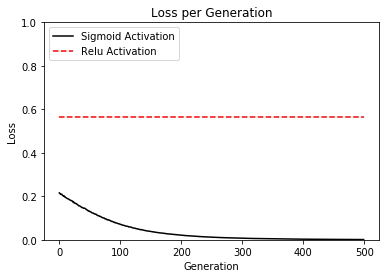

In [33]:
# Plot the loss
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()